# Linear Regression

### In this notebook we attempt to solve Linear Regression with 

1. Gradient Descent 
2. Ordinary Least Squares 

### Read the data

In [1]:
df = pd.read_csv("housing.csv")

In [2]:
import seaborn as sns

In [3]:
## Scale median income 
df.median_income = df.median_income * 10000

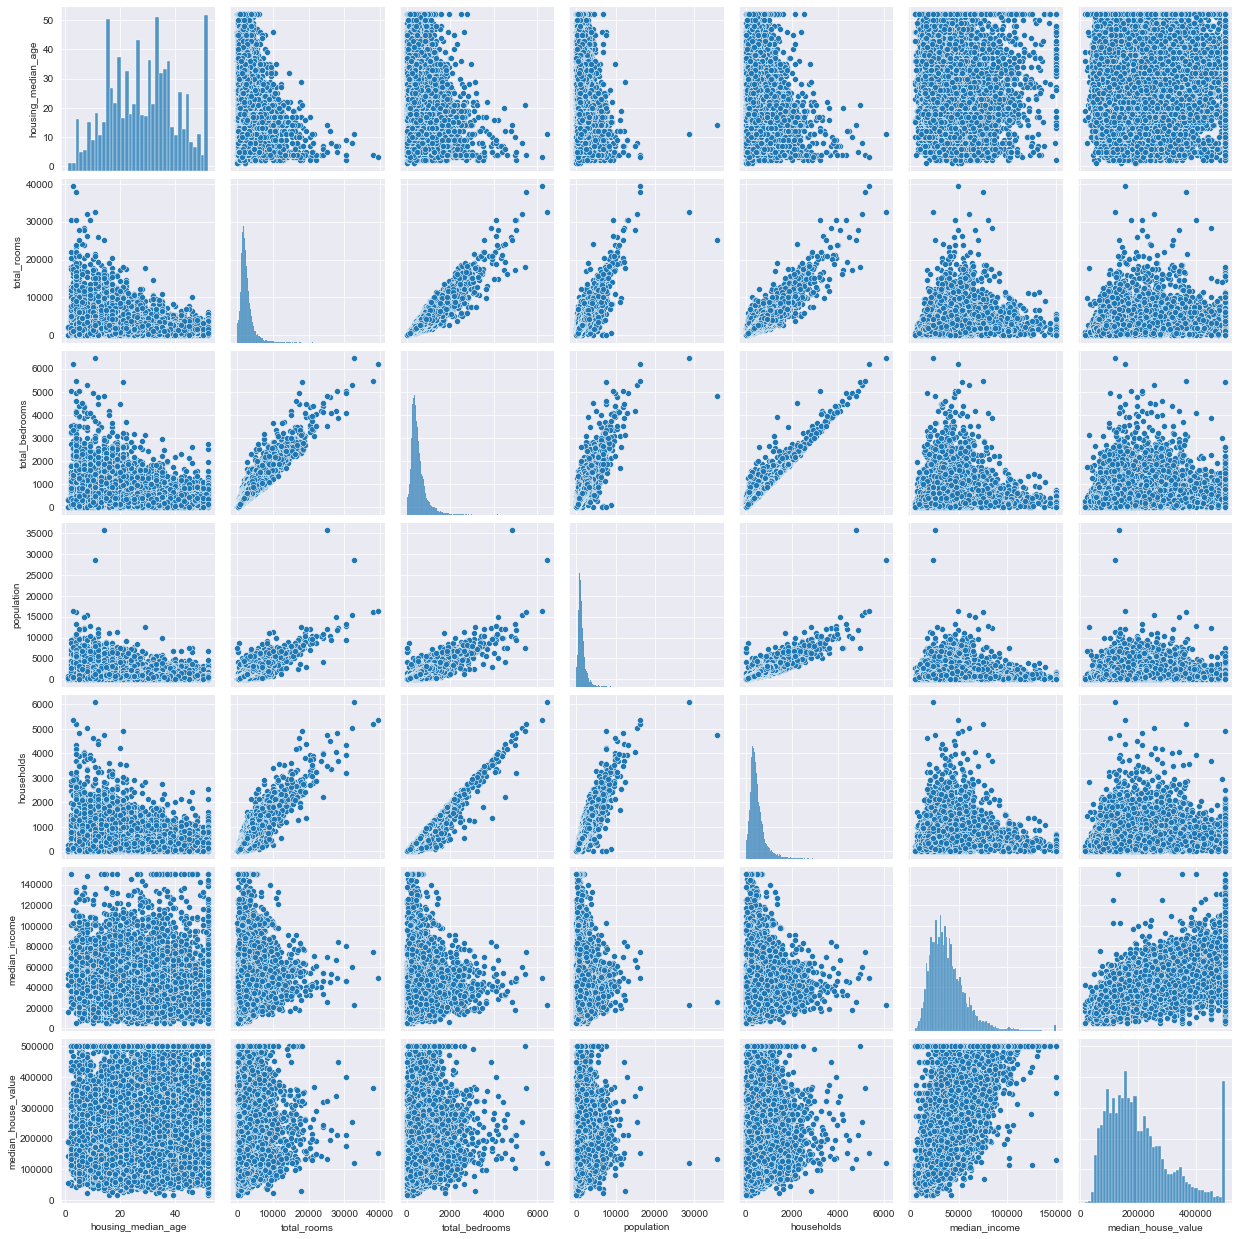

In [4]:
## Rough viz of what has correlations
sns.set_style('darkgrid')
sns.pairplot(df.drop(columns = ['longitude', 'latitude']))

In [5]:
data = df[['median_income', 'median_house_value']]

In [6]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = data['median_income'].values
y = data['median_house_value'].values

# Linear Regression Solution with Gradient Descent

### The equation for the line 

$y$ = $mx$ + $b$

### In order to perform LR with Gradient Descent, we first find the cost function derivative 

The cost function provides us with a comparison metric of our predicted values against the actual values. For our cost function, we use Mean Squared Error (MSE), defined as: 

$\epsilon$ = $\frac{1}{n}$	$\sum_{i=0}^{n} (y_i - \hat{y})^2 $	where $\hat{y}$ is the predicted value and $y_i$ is the actual value 

##### We can substitute $\hat{y}$ with our line equation $\hat{y}$ = $m\hat{x}$ + $b$
To get: 

$\epsilon$ = $\frac{1}{n}$	$\sum_{i=0}^{n} (y_i - (m \cdot x_i + b))^2 $	

### We now want to minimize the error, $\epsilon$
So, we find the partial derivatives of $\epsilon$ with respect to $m$ and $b$ respectively (as these are the two independent variables)


$\epsilon$ = $\frac{1}{n}$	$\sum_{i=0}^{n} (y_i - (m \cdot x_i + b))^2 $	


For $\frac{\delta\epsilon}{\delta m}$:

$\frac{\delta\epsilon}{\delta m}$ = $\frac{1}{n}$ $\sum_{i=0}^{n} 2 \cdot (y_i - (m \cdot x_i + b)) \cdot (-x_i) $

Simplifying, we get: 

$\frac{\delta\epsilon}{\delta m}$ = - $\frac{2}{n}$ $\sum_{i=0}^{n} x_i \cdot (y_i - (m \cdot x_i + b)) $

And for $\frac{\delta\epsilon}{\delta b}$:

$\frac{\delta\epsilon}{\delta b}$ =  - $\frac{2}{n}$  $\sum_{i=0}^{n}  (y_i - (m \cdot x_i + b)) $

### Then we will correct our $m$, $b$ according to these derivatives, with an attached learning rate 

Learning rate ($\alpha$) controls how much we are adjusting the weights of our line with respect the cost fn gradient. 
We set a learning rate to get a better estimate of the minimum error

$m$ = $m$ - $\alpha \cdot \frac{\delta\epsilon}{\delta m}$

$b$ = $b$ - $\alpha \cdot \frac{\delta\epsilon}{\delta b}$

**We do not solve the problems of exploding or shrinking gradients here, is merely a simple vanilla implementation of gradient descent**

In [7]:
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

In [8]:
m, b = np.random.rand(2)
epochs = 500
lr = 0.005

In [9]:
def gradient_descent(m, b, x, y, lr):
    
    error = y - (m * x + b)
    cost = np.dot(error.T, error)
    
    eps_m = (- 2 / x.shape[0] ) * np.dot(x.T, error)
    eps_b = (- 2 / x.shape[0] ) * error.sum()

    m_new, b_new = 0,0 
    
    m_new = m - eps_m * lr
    b_new = b - eps_b * lr 

    return m_new, b_new, cost

In [10]:
for epoch in range(epochs):
    m, b, cost = gradient_descent(m, b, x, y, lr)
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Cost: {cost}")

Epoch 0 Cost: 13257.169692336975
Epoch 20 Cost: 12466.301539412056
Epoch 40 Cost: 11937.233080353119
Epoch 60 Cost: 11583.301222892707
Epoch 80 Cost: 11346.530805793587
Epoch 100 Cost: 11188.13808348951
Epoch 120 Cost: 11082.177825505112
Epoch 140 Cost: 11011.293405382792
Epoch 160 Cost: 10963.873730198375
Epoch 180 Cost: 10932.151306699448
Epoch 200 Cost: 10910.929901265281
Epoch 220 Cost: 10896.733380352667
Epoch 240 Cost: 10887.236308792182
Epoch 260 Cost: 10880.883036129106
Epoch 280 Cost: 10876.632876143012
Epoch 300 Cost: 10873.789639142913
Epoch 320 Cost: 10871.887593886928
Epoch 340 Cost: 10870.61517932715
Epoch 360 Cost: 10869.763969921467
Epoch 380 Cost: 10869.194534868435
Epoch 400 Cost: 10868.813598899618
Epoch 420 Cost: 10868.558763494657
Epoch 440 Cost: 10868.388285805653
Epoch 460 Cost: 10868.274241046243
Epoch 480 Cost: 10868.197948322984


(0.6861860580884037, 0.001195106986988358)

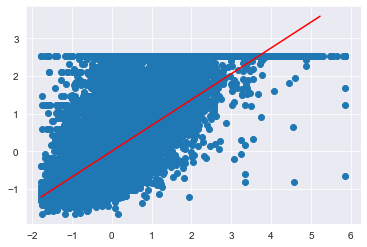

In [11]:
plt.scatter(x, y)
plt.plot(np.arange(x.min(), x.max()), m * np.arange(x.min(), x.max()) + b, color = "red")
m, b

#### How does it compare to out of the box packages?

(0.688075207958548, 2.3851825991448545e-17)

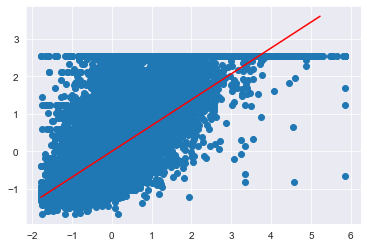

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
regression_plot = plt.plot(np.arange(x.min(), x.max()), reg.coef_ * np.arange(x.min(), x.max()) + reg.intercept_, color = "red")
reg.coef_[0], reg.intercept_

# Linear Regression Solution with Ordinary Least Squares (OLS)

Solution to the linear regression problem without gradient descent requires minimal iterations. 

Given that a point $(x_i, y_i)$  and a point on the predicted line $(\hat x_i, \hat y_i)$ then the distance between the point and the line is $y_i - \hat y_i$.\
Then we have objective, which is

Objective $\normalsize min \space \sum (y_i - \hat y_i)^2$

<img src = "media/ols.png" width="450px"/>

Where

$\large \beta_0 = \bar y - \beta_1 \bar x$

$\large \beta_1 = \sum_{i = 1}^N \frac {(x_i - \bar x)(y_i - \bar y)} {\sum_{i = 1}^N (x_i - \bar x)^2} $

The full proof of deriving this to the derivative can be found here: 
https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf

In [20]:
y_mean = y.mean()
x_mean = x.mean()
beta_1 = np.sum(( y - y_mean ) * ( x - x_mean )) / np.sum(( x - x_mean ) ** 2)
beta_0 = y_mean - beta_1 * x_mean

In [22]:
beta_1, beta_0

(0.6880752079585479, 2.385182599144852e-17)

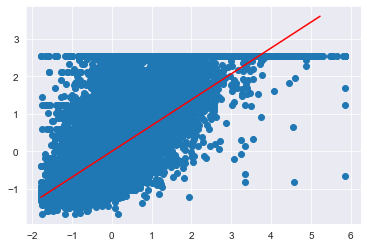

In [24]:
plt.scatter(x, y)
plt.plot(np.arange(x.min(), x.max()), beta_1 * np.arange(x.min(), x.max()) + beta_0, color = "red")